# MPVIS - A Python Library for Multi-perspective Process Visualization

In [5]:
import os
import pandas as pd
import mpvis 

In [6]:
event_log_path = os.path.join("blasting_log.csv")

# Read the event log using Pandas
event_log = pd.read_csv(event_log_path, sep=";")

event_log.head()

,Case ID,Activity,Start,Complete,Resource,Cost
0,1,Coordinate verification of polygon pits status,2022-04-01 08:05:14,2022-04-01 08:12:03,Clara,2539
1,1,Coordinate terrain revision,2022-04-01 08:27:45,2022-04-01 08:35:29,Clara,3267
2,1,Revise terrain,2022-04-01 10:12:49,2022-04-01 11:16:35,GM&PS,62704
3,1,Load pits with explosives,2022-04-01 11:23:45,2022-04-01 13:14:30,Hugo,55006
4,1,Design evacuation card,2022-04-01 13:18:36,2022-04-01 13:43:22,Rosa,10939


In [7]:
# Format event log
event_log_format = {
    "case:concept:name": "Case ID",
    "concept:name": "Activity",
    "time:timestamp": "Complete",
    "start_timestamp": "Start",
    "org:resource": "Resource",
    "cost:total": "Cost",
}

# Format event log 
event_log = mpvis.log_formatter(log=event_log.copy(), log_format=event_log_format)

event_log.head()

,case:concept:name,concept:name,start_timestamp,time:timestamp,org:resource,cost:total
0,1,Coordinate verification of polygon pits status,2022-04-01 08:05:14+00:00,2022-04-01 08:12:03+00:00,Clara,2539
1,1,Coordinate terrain revision,2022-04-01 08:27:45+00:00,2022-04-01 08:35:29+00:00,Clara,3267
2,1,Revise terrain,2022-04-01 10:12:49+00:00,2022-04-01 11:16:35+00:00,GM&PS,62704
3,1,Load pits with explosives,2022-04-01 11:23:45+00:00,2022-04-01 13:14:30+00:00,Hugo,55006
4,1,Design evacuation card,2022-04-01 13:18:36+00:00,2022-04-01 13:43:22+00:00,Rosa,10939


### MP-DFG

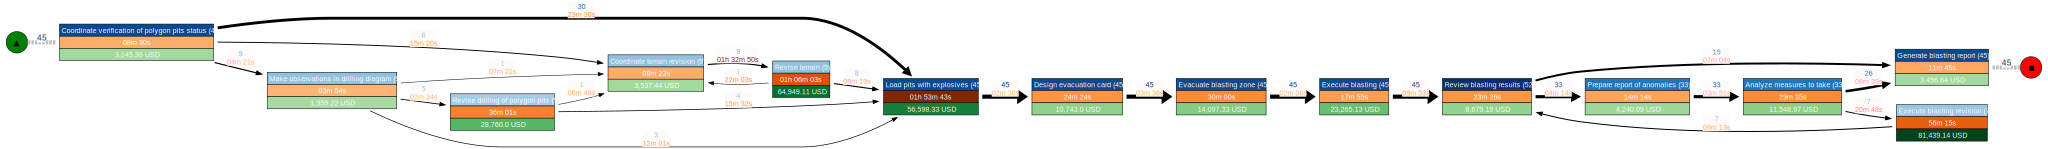

In [8]:
(
    multi_perspective_dfg,
    start_activities,
    end_activities,
) = mpvis.mpdfg.discover_multi_perspective_dfg(
    event_log,
    calculate_cost=True,
    calculate_frequency=True,
    calculate_time=True,
    frequency_statistic="absolute-activity",
    time_statistic="mean",
    cost_statistic="mean",
)

mpvis.mpdfg.view_multi_perspective_dfg(
    multi_perspective_dfg,
    start_activities,
    end_activities,
    visualize_frequency=True,
    visualize_time=True,
    visualize_cost=True,
    rankdir="LR",
)

Manual log grouping:


100%|██████████| 45/45 [00:00<00:00, 268.95it/s]


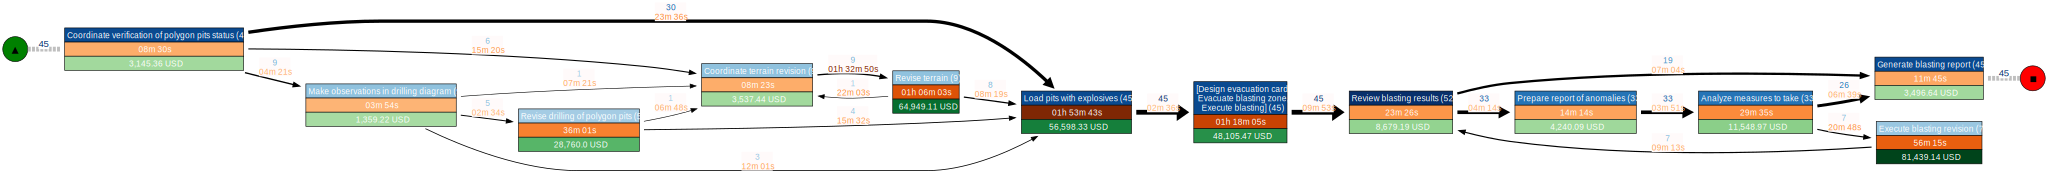

In [9]:
manual_grouped_log = mpvis.preprocessing.manual_log_grouping(
    log=event_log,
    activities_to_group=["Design evacuation card", "Evacuate blasting zone", "Execute blasting"]
)

manual_grouped_dfg, grouped_sa, grouped_ea = mpvis.mpdfg.discover_multi_perspective_dfg(
    log=manual_grouped_log,
    calculate_cost=True,
    calculate_frequency=True,
    calculate_time=True,
    frequency_statistic="absolute-activity",
    time_statistic="mean",
    cost_statistic="mean",
)

mpvis.mpdfg.view_multi_perspective_dfg(
    manual_grouped_dfg, grouped_sa, grouped_ea, visualize_frequency=True, visualize_time=True, visualize_cost=True, rankdir="LR")


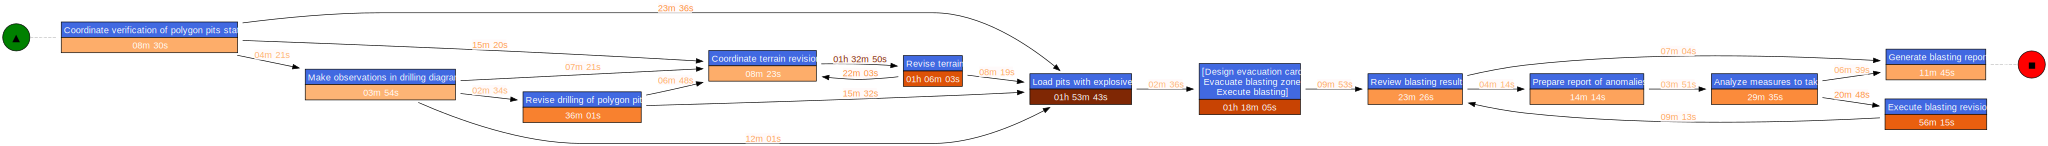

In [10]:
mpvis.mpdfg.view_multi_perspective_dfg(
    manual_grouped_dfg, grouped_sa, grouped_ea, visualize_frequency=False, visualize_time=True, visualize_cost=False, rankdir="LR")

### MD-DRT

In [11]:
multi_dimensional_drt = mpvis.mddrt.discover_multi_dimensional_drt(
    event_log.copy(),
    calculate_cost=True,
    calculate_time=True,
    calculate_flexibility=True,
    calculate_quality=True,
    group_activities=False,
)

Calculating log mandatory activities: 


100%|██████████| 45/45 [00:00<00:00, 3113.97it/s]


Calculating log metrics: 


100%|██████████| 45/45 [00:00<00:00, 1187.46it/s]


Building Tree Cases:


100%|██████████| 45/45 [00:00<00:00, 290.44it/s]


Building Tree Graph:


100%|██████████| 45/45 [00:00<00:00, 3346.40it/s]


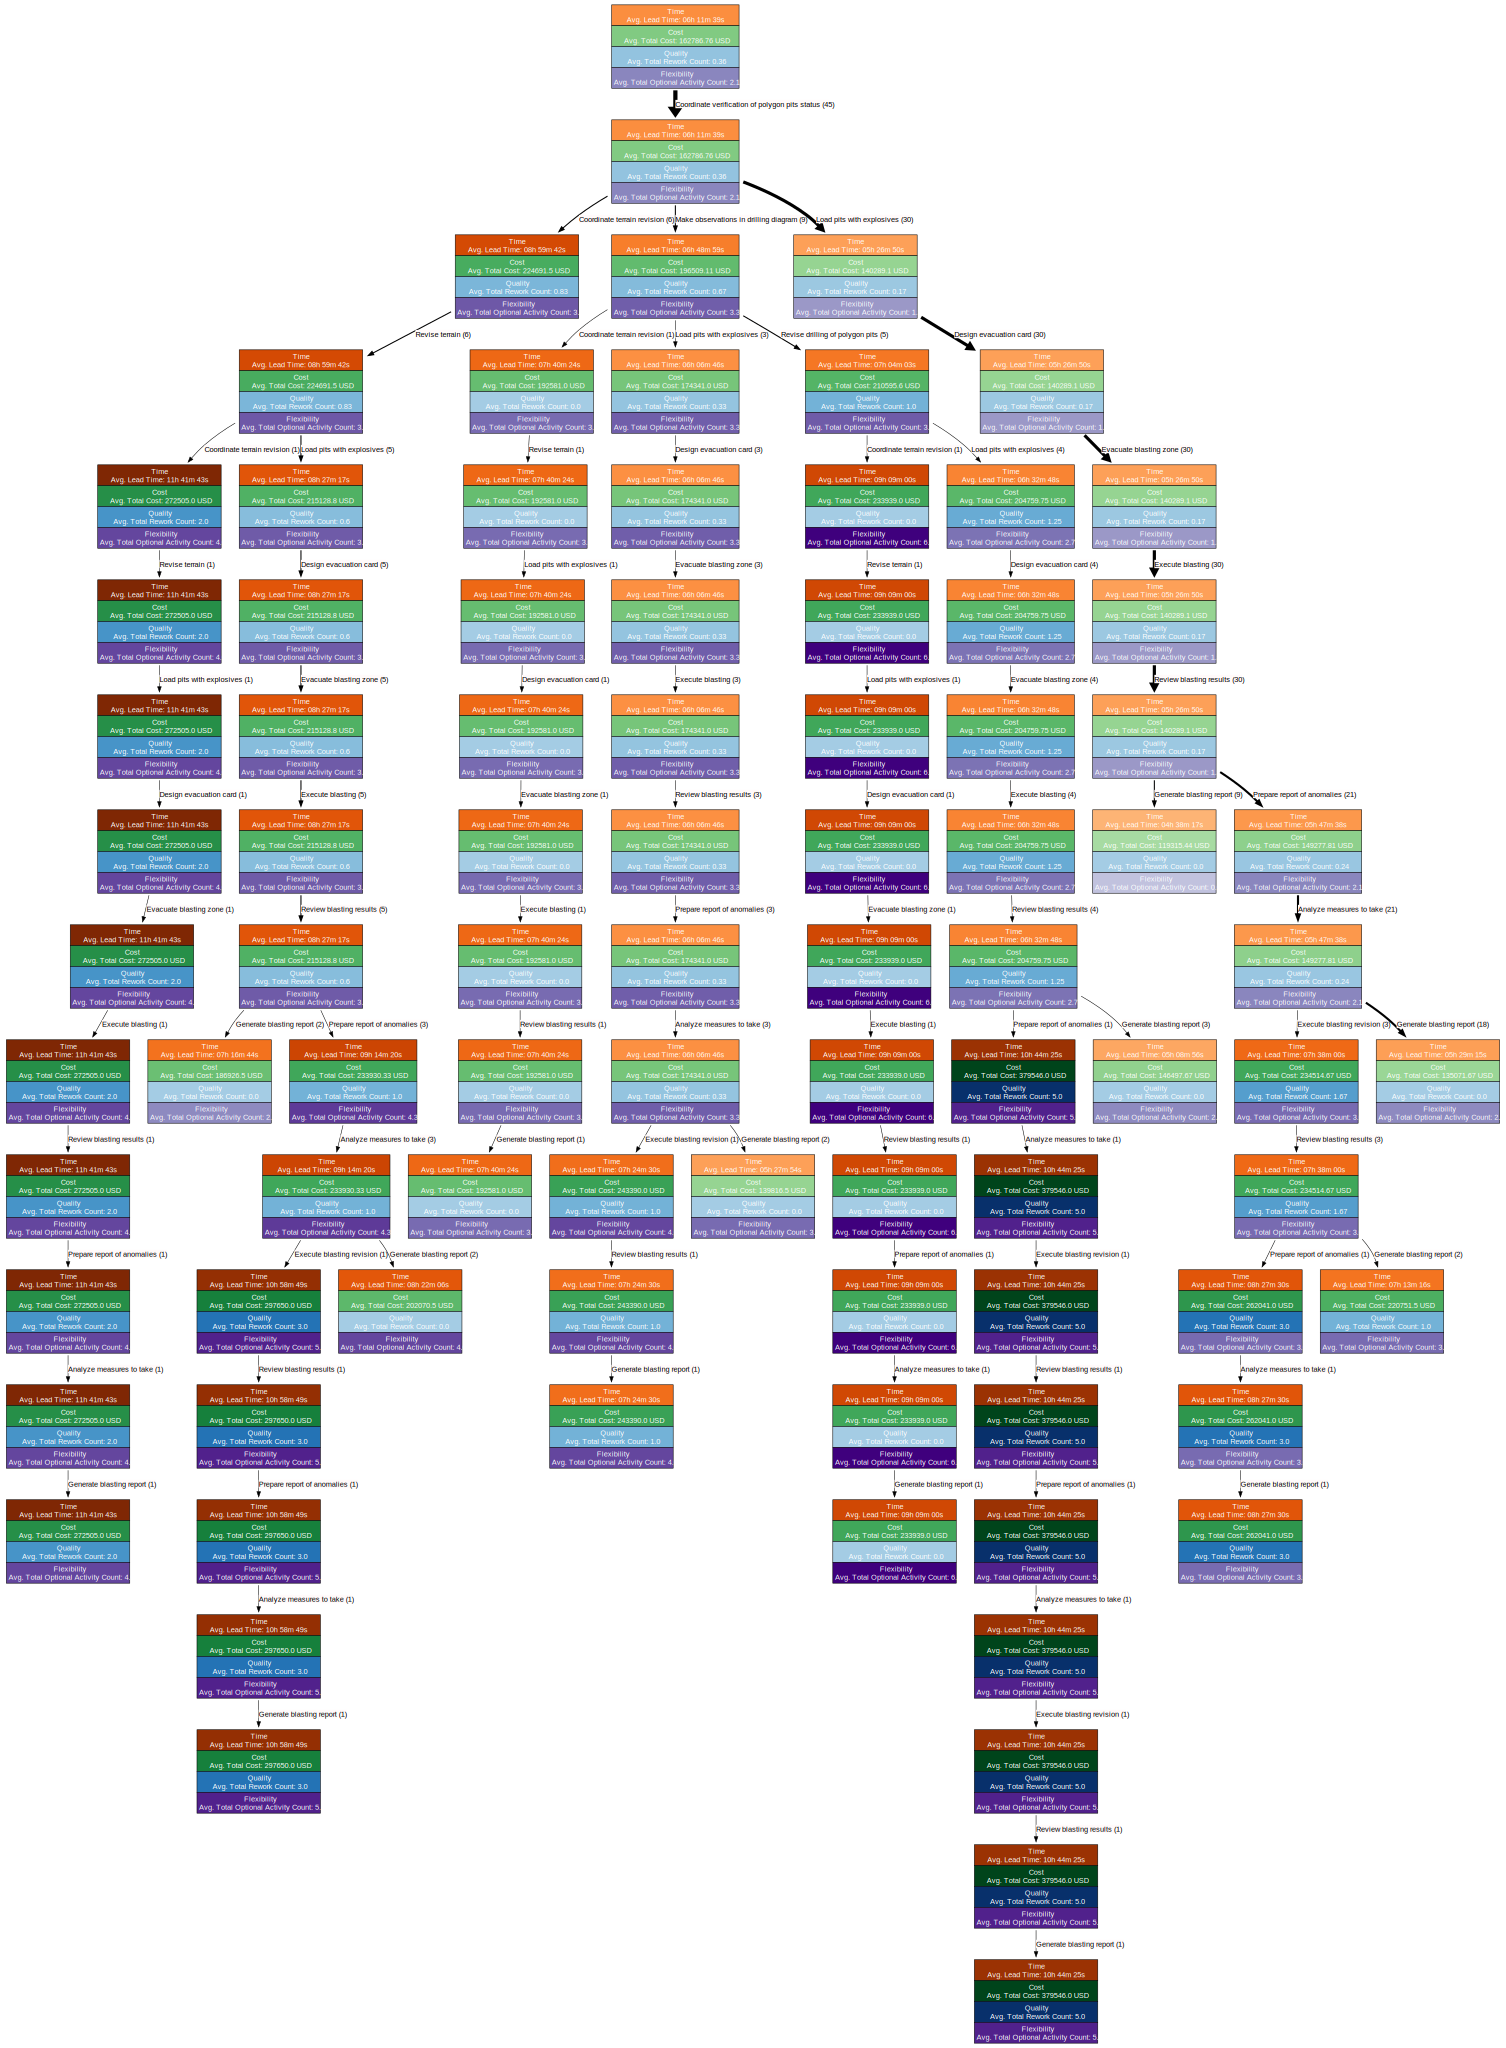

In [12]:
mpvis.mddrt.view_multi_dimensional_drt(
    multi_dimensional_drt,
    visualize_cost=True,
    visualize_time=True,
    visualize_quality=True,
    visualize_flexibility=True
)

Calculating log mandatory activities: 


100%|██████████| 45/45 [00:00<00:00, 3101.33it/s]


Calculating log metrics: 


100%|██████████| 45/45 [00:00<00:00, 171.77it/s]


Building Tree Cases:


100%|██████████| 45/45 [00:00<00:00, 313.95it/s]


Building Tree Graph:


100%|██████████| 45/45 [00:00<00:00, 4987.28it/s]


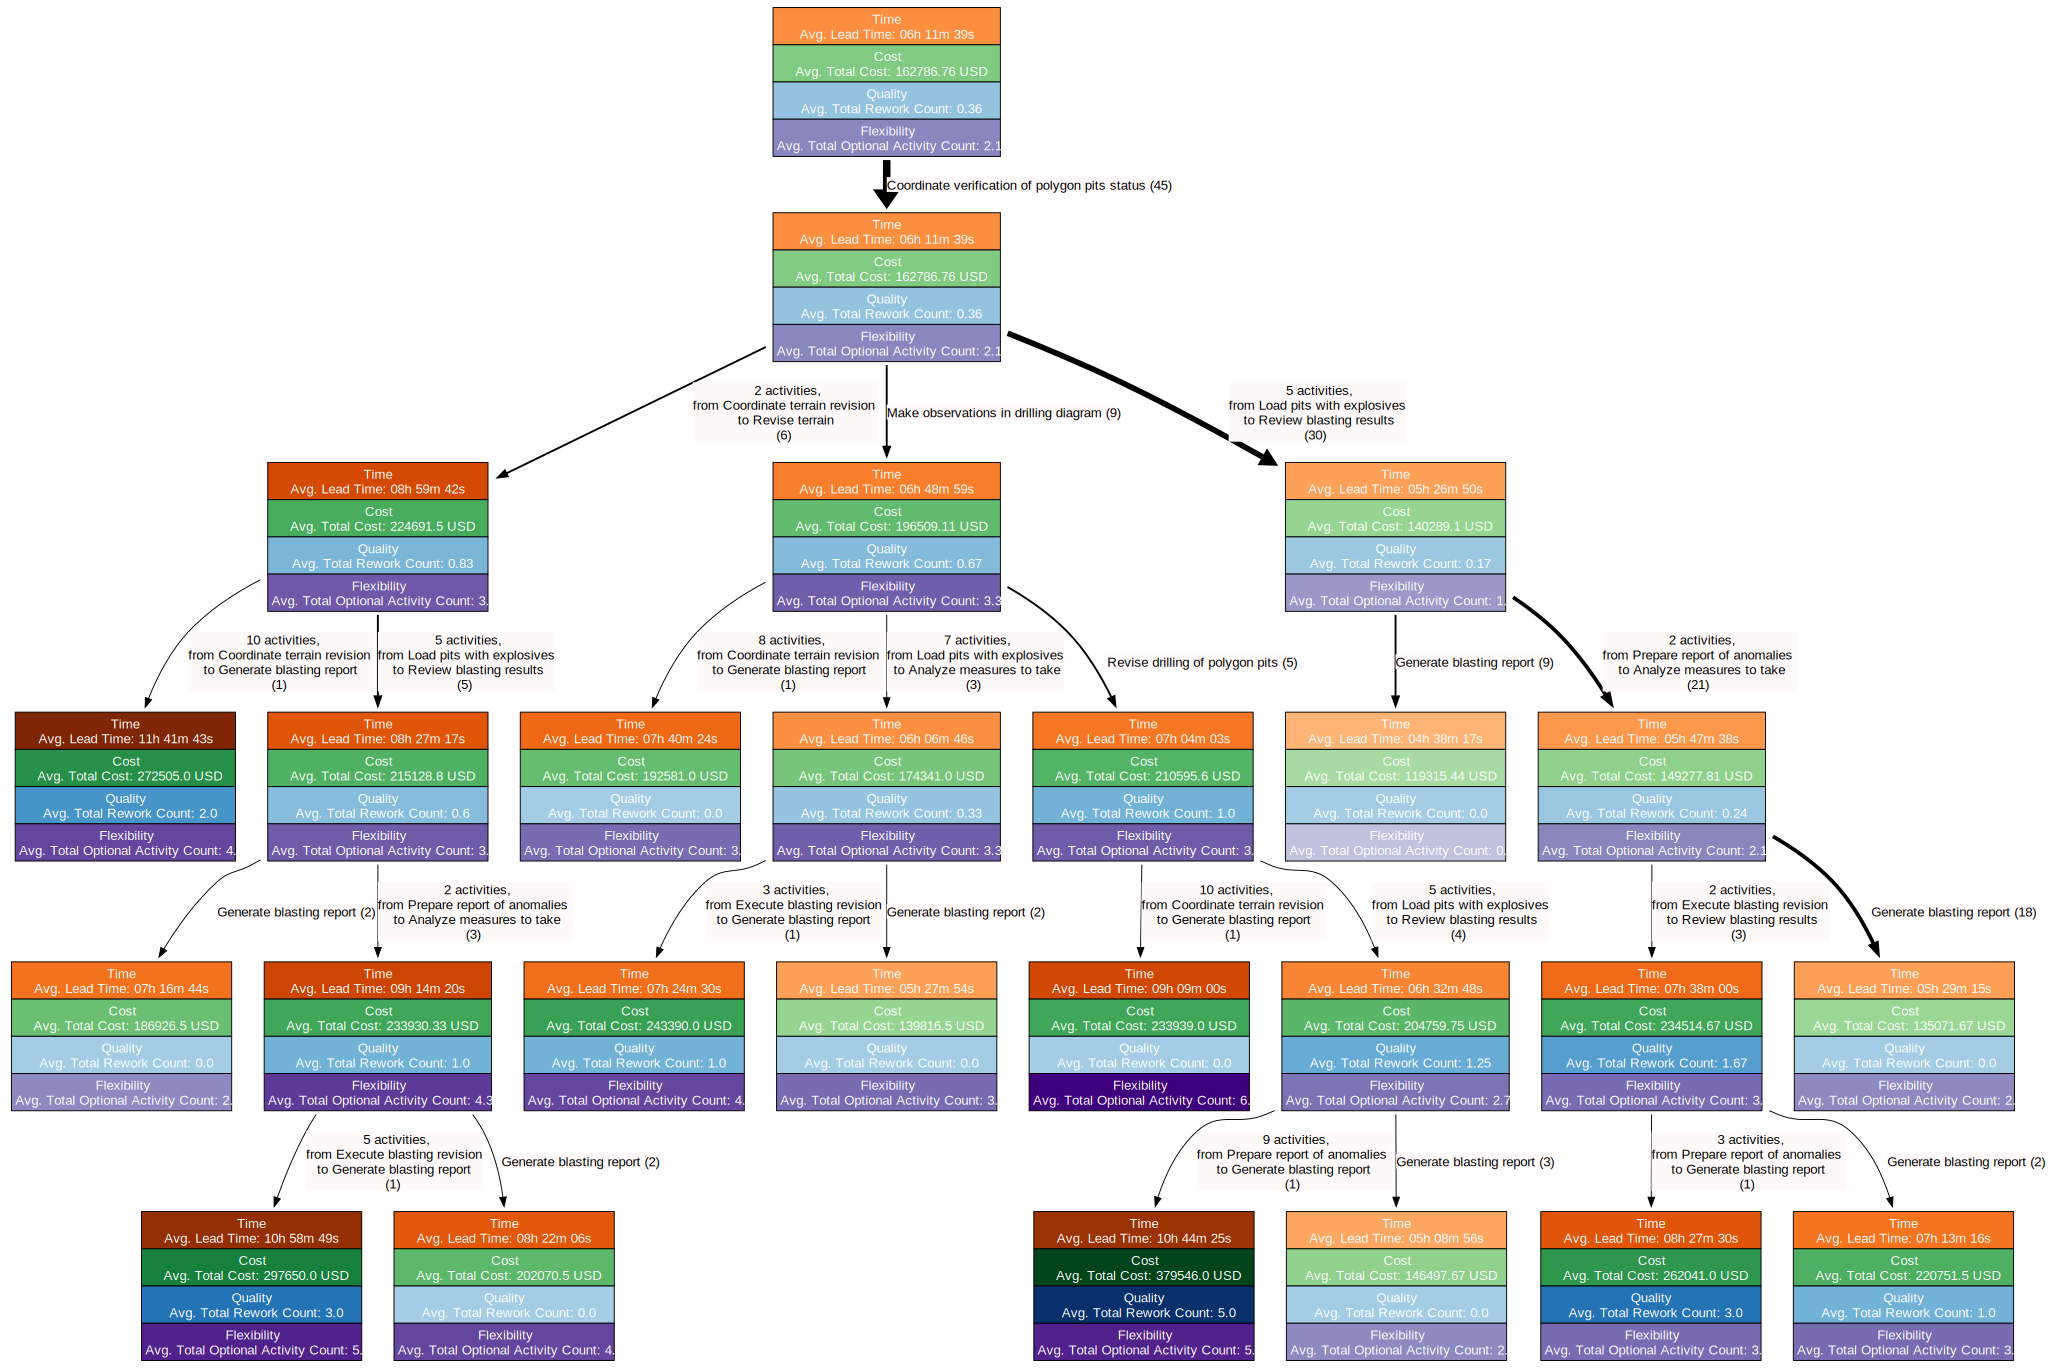

In [13]:
grouped_drt = mpvis.mddrt.discover_multi_dimensional_drt(
    event_log.copy(),
    calculate_cost=True,
    calculate_time=True,
    calculate_flexibility=True,
    calculate_quality=True,
    group_activities=True,
)

mpvis.mddrt.view_multi_dimensional_drt(
    grouped_drt, visualize_cost=True, visualize_time=True, visualize_quality=True, visualize_flexibility=True)

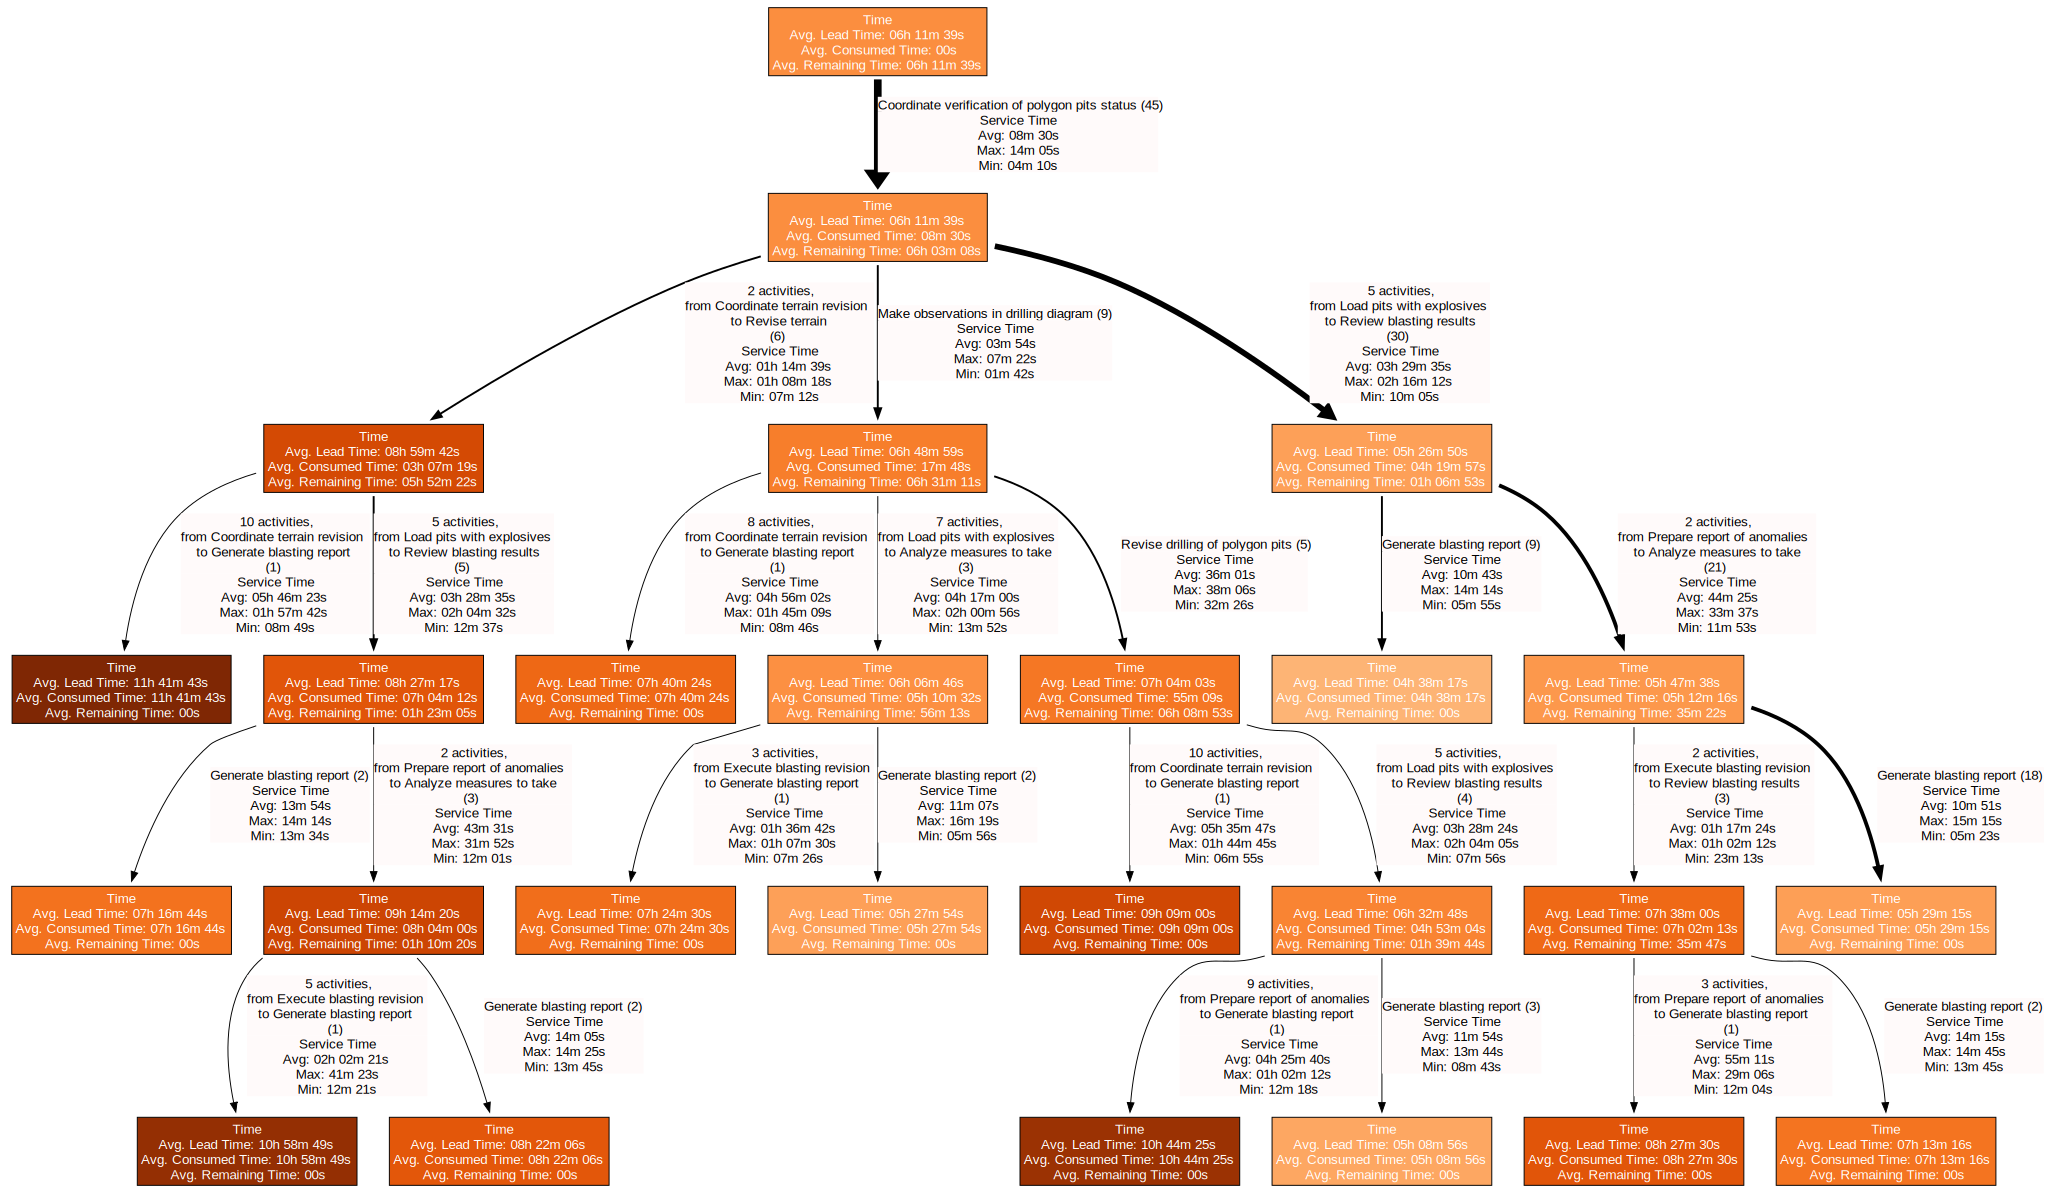

In [14]:
mpvis.mddrt.view_multi_dimensional_drt(
    grouped_drt,
    visualize_cost=False,
    visualize_time=True,
    visualize_quality=False,
    visualize_flexibility=False,
    arc_measures=["avg", "min", "max"],
    node_measures=["total", "consumed", "remaining"]

)

In [15]:
mpvis.mpdfg.save_vis_multi_perspective_dfg(
    multi_perspective_dfg=multi_perspective_dfg,
    start_activities=start_activities,
    end_activities=end_activities,
    rankdir="LR",
    file_name="multi_perspective_dfg",
    format="png"
)

mpvis.mddrt.save_vis_multi_dimensional_drt(
    multi_dimensional_drt=grouped_drt,
    file_path="multi_dimensional_drt",
    format="png"
)